In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#import data - my data is stored in a github repo, i click the csv file and click view raw and use that url.
housing = pd.read_csv('https://raw.githubusercontent.com/bharathkreddy/Linear-Regression/master/housing.csv')

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# OUR CHECKLIST

<ol>
<li> Formulate Problem Statement</li>
    <ul>
    <li> Look at the big picture </li> 
    <li>Get the data and translate your problem statement to a precise statement using features in dataset.</li> 
    </ul><br>
<li> Discover and visualize data to gain insights aka EDA (Exploratory Data Analysis)</li>
    <ul>
    <li> shape and size of dataset</li> 
    <li>Univariate analysis</li> 
    <li>bivariate analysis</li>     
    </ul><br>
<li>Prepare the data for ML algorithms</li>
    <ul><li>Misisng value Treatment</li>
    <li>Outlier Treatment</li>
    <li>Data processsing (scaling, transformation etc)</li></ul><br>
<li>Select a model and train it</li><br>
<li>Fine-tune your model</li><br>
<li>Present Solution</li>
</ol>

## Step1  
### Problem Statement : 
***
Predict the median_house_value by using features given in housing dataset
***

## Step2 EDA    
### shape and size of data: 
***
20640 rows with 10 features.  
Predicted/Dependent varaiable : median_house_value   
Predictors/Independent variables/ features : longitude, latitude, housing_median_age, total_rooms,total_bedrooms,
       population, households, median_income, ocean_proximity  
All features are numerical with only Ocean_proximity having 5 categories  
***

In [10]:
# the dataset has 20,640 rows and 10 columns
housing.shape 

(20640, 10)

In [6]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [11]:
# all the dat is numerical except 'ocean_proximity' which we see is categorical
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [14]:
# lets explore ocean_proximity more
# there are 5 categories with one of these categories with only 5 rows of data 
# - should we merge that with any existing category ?
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [15]:
# Lets look at other fileds
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


***
1. Null values are ignored so you see the count in total_bedrooms is 20433 and not 20640. 
2. Get a feel of data by mentally visualizing the data spreads using the 25th 50th 75th percentiles

***

### Another quick way to get intution around data is to create plot it

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A1F4B2488>,
      dtype=object)

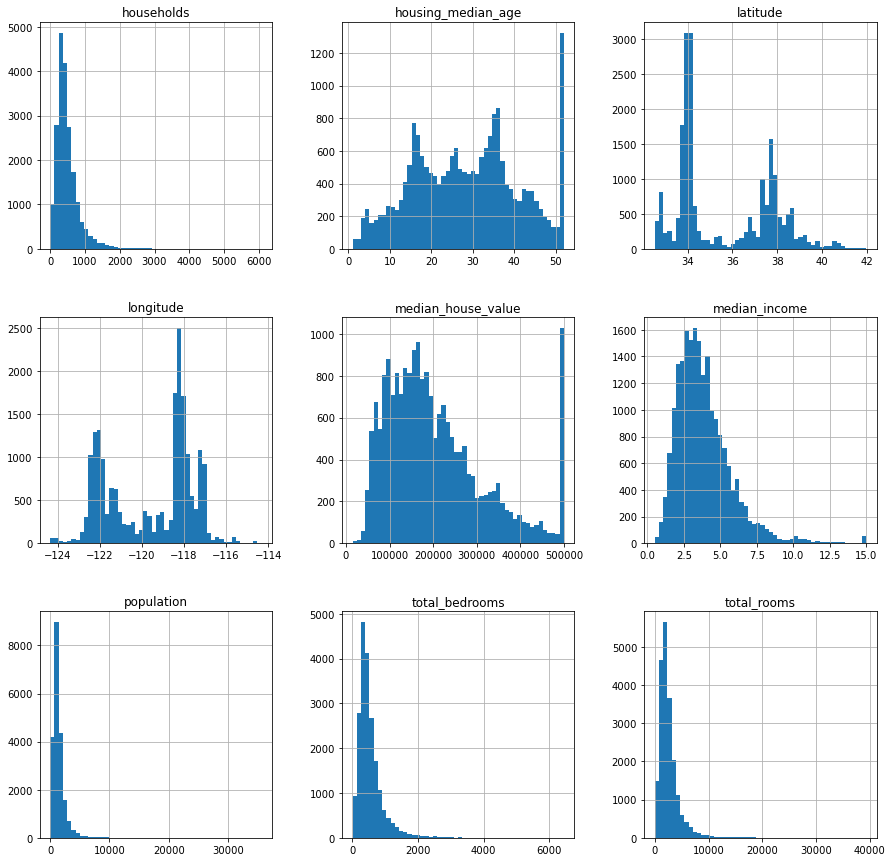

In [17]:
housing.hist(bins=50,figsize=(15,15))